# Stochastik in der Jahrgangsstufe

## elementare Kombinatorik

In [1]:
from sympy import *

Ziehen mit Zurücklegen unter Berücksichtigung der Reihenfolge:
$$ n^k $$

In [2]:
n = 10
k = 5
n**k

100000

Ziehen ohne Zurücklegen unter Berücksichtigung der Reihenfolge:
$$ \frac{n!}{(n-k)!} $$

In [3]:
n = 10
k = 5
factorial(n) / factorial(n-k)

30240

Ziehen ohne Zurücklegen ohne Berücksichtigung der Reihenfolge:
$$ \binom{n}{k} $$

In [4]:
n = 10
k = 5
binomial(n, k)

252

## Pfadregel und Erwartungswert

normaler Würfel wird 3 mal geworfen

In [5]:
from sympy.stats import Die, sample

D1 = Die('D1', 6) 
D2 = Die('D2', 6)
D3 = Die('D3', 6)
dice_throws = [D1, D2, D3]
samples = sample(D1), sample(D2), sample(D3)
samples


(3, 2, 2)

für 50 Würfe:

In [6]:
dice_throws = [Die(f'D{i}', 6) for i in range(1, 51)]

Glücksrad mit Wahrscheinlichkeit $\frac 34$ für "Rot" und $\frac 14$ für "Blau". Wahrscheinlichkeit für "Blau" bei erster Drehung und "Rot" bei zweiter Drehung:

In [7]:
from sympy.stats import FiniteRV, P
rot = 0
blau = 1
rad1 = FiniteRV("rad1", {rot:S(3)/4, blau:S(1)/4})
rad2 = FiniteRV("rad2", {rot:S(3)/4, blau:S(1)/4})
P(And(Eq(rad1, blau), Eq(rad2, rot)))

3/16

Eine Urne enthält 4 rote und 2 blaue Kugeln, es wird zwei Mal gezogen. Wahrscheinlichkeit für "genau eine blaue Kugel"?

In [8]:
from itertools import product
elements = ['r', 'b']
combinations = list(product(elements, repeat=2))
combinations

[('r', 'r'), ('r', 'b'), ('b', 'r'), ('b', 'b')]

In [9]:
one_b = [c for c in combinations if c.count('b') == 1]
one_b

[('r', 'b'), ('b', 'r')]

In [10]:
wverteilung = {'r': S(4)/6, 'b': S(2)/6}
one_b_wkeit = [[wverteilung[c] for c in pfad] for pfad in one_b]
one_b_wkeit

[[2/3, 1/3], [1/3, 2/3]]

In [11]:
wkeit_pfade = [prod(pfad) for pfad in one_b_wkeit]
wkeit_pfade

[2/9, 2/9]

In [12]:
sum(wkeit_pfade)

4/9

## Vierfeldertafel

Bezeichnung der Parameter für die einzelnen Felder:
$$
\begin{array}{|c|c|c|}
\hline
ab & abq & a \\
\hline
aqb & aqbq & aq \\
\hline
b & bq & \\
\hline
\end{array}
$$

In [13]:
from sympyschool.stochjgst import vierfeldertafel
vierfeldertafel(abq=S(14)/100, aqb=S(56)/100, bq=S(36)/100)

<IPython.core.display.Math object>

In [14]:
from sympyschool.stochjgst import vierfeldertafel
vierfeldertafel(normalized=False, ab=504, aqbq=42, a=630, b=672)

<IPython.core.display.Math object>

## Binomialverteilung

In [15]:
from sympy.stats import Binomial, P
from sympy import Eq, S

Standard-Methoden aus Sympy:

In [16]:
X = Binomial('X', n=30, p=S(3)/10)

In [17]:
P(X > 10).evalf()

0.269629613697277

In [18]:
P(X<=10).evalf()

0.730370386302723

In [19]:
P(Eq(X,10)).evalf()

0.141561701062001

In [20]:
P(And(X>5, X<10)).evalf()

0.512213933233171

zusätzl. taschenrechnerähnliche Funktionen:

In [21]:
from sympyschool.stochjgst import binompdf, binomcdf

In [22]:
binompdf(30, S(3)/10, 10).evalf()

0.141561701062001

In [23]:
binomcdf(30, S(3)/10, 10).evalf()

0.730370386302723

### Bestimmung von $n$

Etwa 9% der männl. Bevölkerung haben eine Rotgrünschwäche. Wie groß muss eine Gruppe zufällig ausgewählter Männer mindestens sein, damit mit einer Wahrscheinlichkeit von mindestens 85% mindestens 5 eine Rotgrünschwäche haben.

In [24]:
from sympy.stats import Binomial, P

In [25]:
n = 1
while True:
    X = Binomial('X', n, .09)
    if P(X >=5) >= 0.85:
        print(f"n={n}: {P(X >=5)}")
        X = Binomial('X', n-1, .09)
        print(f"n={n-1}: {P(X >=5)}")
        break
    n += 1

n=80: 0.856888389852671
n=79: 0.849369880557182


### Bestimmung von k

Ein Multiple-Choice-Test besteht aus 20 Fragen. Zu jeder Frage gibt es 3 Antwortmöglichkeiten, von denen genau eine richtig ist. Die Wahrscheinlichkeit, dass jemand nur durch Raten den Test besteht, soll höchstens 5% betragen. Mindestanzahl an richtigen Antworten, die für das Bestehen verlangt werden muss.

In [26]:
from sympy.stats import Binomial, P
from sympy import S

In [27]:
k = 1
while True:
    X = Binomial('X', 20, S(1)/3)
    if P(X>=k) <= 0.05:
        print(f"k={k-1}: {P(X>=k-1).evalf()}")
        print(f"k={k}: {P(X>=k).evalf()}")
        break
    k += 1

k=10: 0.0918957744872623
k=11: 0.0376365710946634


Ein Multiple-Choice-Test besteht aus 20 Fragen. Zu jeder Frage gibt es gleich viele Antwortmöglichkeiten, von denen genau eine richtig ist. Die Wahrscheinlichkeit, dass jemand nur durch Raten den Test besteht, soll höchstens 5% betragen. Für das Bestehen sind mindestens 8 richtige Antworten notwendig. Mindestanzahl an Antwortmöglickeiten pro Frage?

In [28]:
from sympy.stats import Binomial, P
from sympy import S

In [29]:
m = 1
while True:
    X = Binomial('X', 20, S(1)/m)
    if P(X>=8) <= 0.05:
        print(f"m={m}: {P(X>=8).evalf()}")
        X = Binomial('X', 20, S(1)/(m-1))
        print(f"m={m-1}: {P(X>=8).evalf()}")
        break
    m += 1

m=5: 0.0321426630808751
m=4: 0.101811856922723


### Erwartungswert, Varianz, Standardabweichung

In [30]:
from sympy.stats import Binomial, E, variance, std
from sympy import S
X = Binomial('X', n=30, p=S(3)/10)

In [31]:
E(X).evalf()

9.00000000000000

In [32]:
variance(X).evalf()

6.30000000000000

In [33]:
std(X).evalf()

2.50998007960223

### Histogramme

In [34]:
from sympy.stats import Binomial, P
from sympy import S, Eq
import matplotlib.pyplot as plt

X = Binomial('X', n=30, p=S(3)/10)

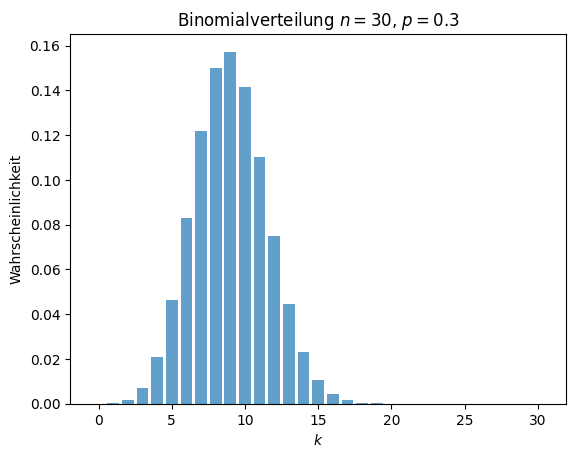

In [35]:
data = [P(Eq(X,k)) for k in range(31)]

# Plot the histogram
plt.bar(range(31), data, align='center', alpha=0.7)
plt.xlabel(r'$k$')
plt.ylabel('Wahrscheinlichkeit')
plt.title(r'Binomialverteilung $n=30$, $p=0.3$')
plt.show()

## einseitiger Hypothesentest

Nullhypothese: "Es keimen höchstens 85% der Samen." Test auf höhere Keimungsrate. Stichprobenumfang 500 Samen, Signifikanzniveau 5%. Ablehnungsbereich und Irrtumswahrscheinlichkeit?

In [36]:
from sympyschool.stochjgst import Hypothesentest_rechts

In [37]:
h = Hypothesentest_rechts(n=500, p0=.85, alpha=0.05)

In [38]:
h.get_ablehnungsbereich()

439

In [39]:
h.get_irrtumswahrscheinlichkeit()

0.0426251508811221

In [40]:
h.get_fehler2(.86)

0.864157809720006

Nulhypothese: "Anteil defekter Teile mindestens 8%." Test auf geringere Defektrate. Stichprobenumfang 200, Signifikanzniveau 5%. Ablehnungsbereich und Irrtumswahrscheinlichkeit?

In [41]:
from sympyschool.stochjgst import Hypothesentest_links

In [42]:
h = Hypothesentest_links(n=200, p0=.08, alpha=0.05)

In [43]:
h.get_ablehnungsbereich()

9

In [44]:
h.get_irrtumswahrscheinlichkeit()

0.0373707322519869

In [45]:
h.get_fehler2(.04)

0.280799998664119

### beidseitiger Hypothesentest

In [46]:
from sympyschool.stochjgst import Hypothesentest_beidseitig

Glücksspielautomat, mit W. 15% soll "Gewinn" erscheinen. Testen mit Stichprobenumfang 100 und Signifikanzniveau 5%.

In [47]:
h = Hypothesentest_beidseitig(100, .15, .05)

In [48]:
h.get_ablehnungsbereich_links(), h.get_ablehnungsbereich_rechts()

(7, 23)

In [49]:
h.get_irrtumswahrscheinlichkeit()

0.0343072490221749

In [50]:
h.get_fehler2(.1)

0.793834981876260